In [1]:
import pandas as pd
import zipfile
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_digits
digits = load_digits()


from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
z = zipfile.ZipFile("/content/drive/MyDrive/YouTube-Spam-Collection-v1.zip")
Psy = pd.read_csv(z.open("Youtube01-Psy.csv"))
Katy = pd.read_csv(z.open("Youtube02-KatyPerry.csv"))
LMFAO = pd.read_csv(z.open("Youtube03-LMFAO.csv"))
Eminem = pd.read_csv(z.open("Youtube04-Eminem.csv"))
Shakira = pd.read_csv(z.open("Youtube05-Shakira.csv"))

In [5]:
data = pd.concat([Psy,Katy,LMFAO,Eminem,Shakira])
data.head()


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [6]:
data = pd.concat([Psy,Katy,LMFAO,Eminem,Shakira])
data.drop(["COMMENT_ID","DATE","AUTHOR"],axis=1,inplace=True)


In [9]:
print(data.CLASS)

0      1
1      1
2      1
3      1
4      1
      ..
365    0
366    0
367    0
368    0
369    0
Name: CLASS, Length: 1956, dtype: int64


In [46]:
from sklearn.model_selection import train_test_split

X=data[['CONTENT']]  # Features
y=data['CLASS']  # Labels

# Split dataset into training set and test set
X_train,X_test,y_train,y_test=train_test_split(data["CONTENT"],data["CLASS"],test_size=0.2,random_state=280)
print(X_train,X_test,y_train,y_test)

332    The girl in the train who was dancing, her out...
222    This video is so racist!!! There are only anim...
30     This Will Always Be My Favorite Song<br />But ...
403    Subscribe to me if u think &quot;swag&quot; is...
277                               Was that Meghan fox??﻿
                             ...                        
240                    Check out this video on YouTube:﻿
96     I made a gaming channel (Unique right?) :L Ang...
146                  Me and my aunt love this song!!!!!﻿
413    Check the shit out on my channel<br /><br /><b...
105                                   1000000000 views.﻿
Name: CONTENT, Length: 1564, dtype: object 211                                          so beutiful
256    Hey guys! Check this out: Kollektivet - Don't ...
255    /watch?v=Dtqcftr1Fac JUSTIEN BIEBER CAR 2013. ...
274                                               good!!
283                                 shakira is the best!
                             ...             

In [47]:
tfidf_vect = TfidfVectorizer(use_idf=True,lowercase=True)
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_train_tfidf.shape

(1564, 3746)

In [48]:
# creating a RF classifier
model = RandomForestClassifier(n_estimators = 100) 
 

# fit function is used to train the model using the training sets as parameters
model.fit(X_train_tfidf,y_train)
 


RandomForestClassifier()

In [49]:
X_test_tfidf= tfidf_vect.transform(X_test)
predictions = model.predict(X_test_tfidf)
predictions

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [50]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)

print(cf_matrix)

[[175   3]
 [ 17 197]]


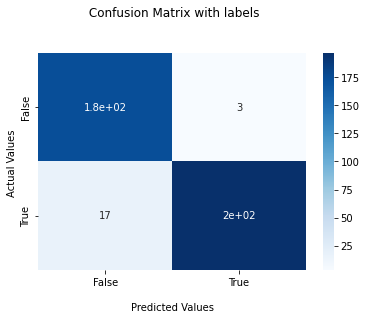

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       178
           1       0.98      0.92      0.95       214

    accuracy                           0.95       392
   macro avg       0.95      0.95      0.95       392
weighted avg       0.95      0.95      0.95       392

